**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [90]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 500)

import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

from sklearn.feature_extraction import DictVectorizer
sns.set_context('talk')

In [91]:
# Acá deberían leer el conjunto de datos que ya tienen.
df=pd.read_csv('melbourne_houses_final_df.csv')

df.head(2)

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,SellerG,Suburb,date_month,date_year,antiguedad,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_weekly_price_count,airbnb_monthly_price_mean,airbnb_monthly_price_count
0,2,h,1035000.0,S,2016-02-04,2.5,3067.0,1.0,0.0,156.0,79.0,1900,-37.8079,144.9934,Northern Metropolitan,4019.0,Biggin,Abbotsford,2,2016,mayor_50,3067.0,130.624031,258.0,-0.010243,46.0,-0.062897,31.0
1,3,h,1465000.0,SP,2017-03-04,2.5,3067.0,2.0,0.0,134.0,150.0,1900,-37.8093,144.9944,Northern Metropolitan,4019.0,Biggin,Abbotsford,3,2017,mayor_50,3067.0,130.624031,258.0,-0.010243,46.0,-0.062897,31.0


In [92]:
df.shape

(7464, 28)

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [93]:
# Es importante no tener nulos para OneHotEncoder
df.isnull().sum()

Rooms                            0
Type                             0
Price                            0
Method                           0
Date                             0
Distance                         0
Postcode                         0
Bathroom                         0
Car                             28
Landsize                         0
BuildingArea                  1237
YearBuilt                        0
Lattitude                        0
Longtitude                       0
Regionname                       0
Propertycount                    0
SellerG                          0
Suburb                           0
date_month                       0
date_year                        0
antiguedad                       0
zipcode                          0
airbnb_price_mean                0
airbnb_record_count              0
airbnb_weekly_price_mean         0
airbnb_weekly_price_count        0
airbnb_monthly_price_mean        0
airbnb_monthly_price_count       0
dtype: int64

In [94]:
df.shape

(7464, 28)

Seguimos teniendo valores nulos en la variable Car. Como son únicamente 28, los podemos quitar directamente.

In [95]:
df.dropna(subset=['Car'],inplace=True)
df.isnull().sum()

Rooms                            0
Type                             0
Price                            0
Method                           0
Date                             0
Distance                         0
Postcode                         0
Bathroom                         0
Car                              0
Landsize                         0
BuildingArea                  1234
YearBuilt                        0
Lattitude                        0
Longtitude                       0
Regionname                       0
Propertycount                    0
SellerG                          0
Suburb                           0
date_month                       0
date_year                        0
antiguedad                       0
zipcode                          0
airbnb_price_mean                0
airbnb_record_count              0
airbnb_weekly_price_mean         0
airbnb_weekly_price_count        0
airbnb_monthly_price_mean        0
airbnb_monthly_price_count       0
dtype: int64

In [96]:
"""

La columna fecha como tal no tiene sentido hacer OneHotEncoding, escalarla o imputarla. Mas bien nos serivía para hacer ingenería de
features.
En cuanto a latitud y longitud, habíamos establecido que nos serviría para la parte de visualización. Ya contamos con otras variables
referidas a la ubicación geográfica de las propiedades.

"""

df.drop(['Date','Lattitude','Longtitude'],inplace=True,axis=1)

#Este dataframe será utilizado en el punto dos
df_building_year=df[['BuildingArea','YearBuilt']]

#Quitamos las columnas 
df.drop(['BuildingArea','YearBuilt'],axis=1,inplace=True)


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7436 entries, 0 to 7463
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rooms                       7436 non-null   int64  
 1   Type                        7436 non-null   object 
 2   Price                       7436 non-null   float64
 3   Method                      7436 non-null   object 
 4   Distance                    7436 non-null   float64
 5   Postcode                    7436 non-null   float64
 6   Bathroom                    7436 non-null   float64
 7   Car                         7436 non-null   float64
 8   Landsize                    7436 non-null   float64
 9   Regionname                  7436 non-null   object 
 10  Propertycount               7436 non-null   float64
 11  SellerG                     7436 non-null   object 
 12  Suburb                      7436 non-null   object 
 13  date_month                  7436 

In [98]:
"""

Cambiamos el tipo de algunas variables de tipo int o float que en realidad son categóricas. Esto nos trae inconvenientes para 
OneHotEncoder, no con get_dummies de pandas.

"""

df.Rooms=df.Rooms.astype(str)
df.Car=df.Car.astype(str)
df.Method=df.Method.astype(str)
df.Postcode=df.Postcode.astype(str)
df.Bathroom=df.Bathroom.astype(str)
df.zipcode=df.zipcode.astype(str)
df.date_year=df.date_year.astype(str)
df.date_month=df.date_month.astype(str)
df.zipcode=df.zipcode.astype(str)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7436 entries, 0 to 7463
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rooms                       7436 non-null   object 
 1   Type                        7436 non-null   object 
 2   Price                       7436 non-null   float64
 3   Method                      7436 non-null   object 
 4   Distance                    7436 non-null   float64
 5   Postcode                    7436 non-null   object 
 6   Bathroom                    7436 non-null   object 
 7   Car                         7436 non-null   object 
 8   Landsize                    7436 non-null   float64
 9   Regionname                  7436 non-null   object 
 10  Propertycount               7436 non-null   float64
 11  SellerG                     7436 non-null   object 
 12  Suburb                      7436 non-null   object 
 13  date_month                  7436 

### Get_dummies

In [100]:
cols_cat=['Rooms','Type','Method','Postcode','Bathroom','Car','Regionname','SellerG','Suburb','zipcode',
         'antiguedad','date_year','date_month']

In [101]:
#Dataframe con variables numéricas

df_num=df.drop(cols_cat,axis=1).reset_index(drop=True)

df_num.head(2)

,Price,Distance,Landsize,Propertycount,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_weekly_price_count,airbnb_monthly_price_mean,airbnb_monthly_price_count
0,1035000.0,2.5,156.0,4019.0,130.624031,258.0,-0.010243,46.0,-0.062897,31.0
1,1465000.0,2.5,134.0,4019.0,130.624031,258.0,-0.010243,46.0,-0.062897,31.0


In [102]:
"""
Si ponemos drop_first=False, sería lo mismo que OneHotEncoding. En cambio si ponemos True, nos quitará una columna.

"""

df_dummies = pd.get_dummies(df,columns=cols_cat, drop_first=False)  

df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7436 entries, 0 to 7463
Columns: 856 entries, Price to date_month_9
dtypes: float64(10), uint8(846)
memory usage: 6.6 MB


### One Hot encoding

In [103]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse=False)

df_onehot=encoder.fit_transform(df[cols_cat])

df_onehot=pd.DataFrame(df_onehot,columns=encoder.get_feature_names())

df_onehot=pd.concat([df_onehot,df_num],axis=1)

df_onehot.shape

(7436, 856)

### DimVectorizer

In [104]:
#Convertimos en DataFrame en diccionario para poder utilizar DictVectorizer()

dict_cat=list(df[cols_cat].T.to_dict().values())
dict_cat[:2]

[{'Rooms': '2',
  'Type': 'h',
  'Method': 'S',
  'Postcode': '3067.0',
  'Bathroom': '1.0',
  'Car': '0.0',
  'Regionname': 'Northern Metropolitan',
  'SellerG': 'Biggin',
  'Suburb': 'Abbotsford',
  'zipcode': '3067.0',
  'antiguedad': 'mayor_50',
  'date_year': '2016',
  'date_month': '2'},
 {'Rooms': '3',
  'Type': 'h',
  'Method': 'SP',
  'Postcode': '3067.0',
  'Bathroom': '2.0',
  'Car': '0.0',
  'Regionname': 'Northern Metropolitan',
  'SellerG': 'Biggin',
  'Suburb': 'Abbotsford',
  'zipcode': '3067.0',
  'antiguedad': 'mayor_50',
  'date_year': '2017',
  'date_month': '3'}]

In [105]:
#Nos genera una matriz sparse

vec=DictVectorizer()
df_cat=vec.fit_transform(dict_cat)
df_cat

<7436x846 sparse matrix of type '<class 'numpy.float64'>'
	with 96668 stored elements in Compressed Sparse Row format>

In [106]:
vec.get_feature_names()[:5]

['Bathroom=0.0',
 'Bathroom=1.0',
 'Bathroom=2.0',
 'Bathroom=3.0',
 'Bathroom=4.0']

In [107]:
 #La convertimos en matriz densa y luego en DataFrame.

df_cat=df_cat.todense()
df_cat=pd.DataFrame(df_cat,columns=vec.get_feature_names())

df_dimvect=pd.concat([df_num,df_cat],axis=1)

In [108]:
df_dimvect

,Price,Distance,Landsize,Propertycount,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_weekly_price_count,airbnb_monthly_price_mean,airbnb_monthly_price_count,Bathroom=0.0,Bathroom=1.0,Bathroom=2.0,Bathroom=3.0,Bathroom=4.0,Bathroom=5.0,Bathroom=6.0,Bathroom=8.0,Car=0.0,Car=1.0,Car=10.0,Car=2.0,Car=3.0,Car=4.0,Car=5.0,Car=6.0,Car=7.0,Car=8.0,Car=9.0,Method=PI,Method=S,Method=SA,Method=SP,Method=VB,Postcode=3000.0,Postcode=3002.0,Postcode=3003.0,Postcode=3006.0,Postcode=3011.0,Postcode=3012.0,Postcode=3013.0,Postcode=3015.0,Postcode=3016.0,Postcode=3018.0,Postcode=3019.0,Postcode=3020.0,Postcode=3021.0,Postcode=3023.0,Postcode=3024.0,Postcode=3025.0,Postcode=3027.0,Postcode=3028.0,Postcode=3029.0,Postcode=3030.0,Postcode=3031.0,Postcode=3032.0,Postcode=3033.0,Postcode=3037.0,Postcode=3039.0,Postcode=3040.0,Postcode=3042.0,Postcode=3043.0,Postcode=3044.0,Postcode=3046.0,Postcode=3047.0,Postcode=3049.0,Postcode=3051.0,Postcode=3052.0,Postcode=3053.0,Postcode=3054.0,Postcode=3055.0,Postcode=3056.0,Postcode=3057.0,Postcode=3058.0,Postcode=3059.0,Postcode=3064.0,Postcode=3065.0,Postcode=3066.0,Postcode=3067.0,Postcode=3068.0,Postcode=3070.0,Postcode=3071.0,Postcode=3072.0,Postcode=3073.0,Postcode=3074.0,Postcode=3076.0,Postcode=3078.0,Postcode=3079.0,Postcode=3081.0,Postcode=3082.0,Postcode=3083.0,Postcode=3084.0,Postcode=3088.0,Postcode=3095.0,Postcode=3101.0,Postcode=3102.0,Postcode=3103.0,Postcode=3104.0,Postcode=3105.0,Postcode=3106.0,Postcode=3107.0,Postcode=3108.0,Postcode=3109.0,Postcode=3113.0,Postcode=3116.0,Postcode=3121.0,Postcode=3122.0,Postcode=3123.0,Postcode=3124.0,Postcode=3125.0,Postcode=3126.0,Postcode=3127.0,Postcode=3128.0,Postcode=3130.0,Postcode=3131.0,Postcode=3132.0,Postcode=3133.0,Postcode=3134.0,Postcode=3135.0,Postcode=3136.0,Postcode=3138.0,Postcode=3141.0,Postcode=3142.0,Postcode=3143.0,Postcode=3144.0,Postcode=3145.0,Postcode=3146.0,Postcode=3147.0,Postcode=3148.0,Postcode=3149.0,Postcode=3150.0,Postcode=3151.0,Postcode=3152.0,Postcode=3153.0,Postcode=3155.0,Postcode=3156.0,Postcode=3161.0,Postcode=3162.0,Postcode=3163.0,Postcode=3165.0,Postcode=3166.0,Postcode=3167.0,Postcode=3168.0,Postcode=3169.0,Postcode=3170.0,Postcode=3171.0,Postcode=3172.0,Postcode=3173.0,Postcode=3174.0,Postcode=3175.0,Postcode=3178.0,Postcode=3179.0,Postcode=3181.0,Postcode=3182.0,Postcode=3183.0,Postcode=3184.0,Postcode=3185.0,Postcode=3186.0,Postcode=3187.0,Postcode=3188.0,Postcode=3189.0,Postcode=3190.0,Postcode=3191.0,Postcode=3192.0,Postcode=3193.0,Postcode=3194.0,Postcode=3195.0,Postcode=3196.0,Postcode=3197.0,Postcode=3198.0,Postcode=3199.0,Postcode=3204.0,Postcode=3205.0,Postcode=3206.0,Postcode=3207.0,Postcode=3337.0,Postcode=3338.0,Postcode=3429.0,Postcode=3752.0,Postcode=3754.0,Postcode=3775.0,Postcode=3777.0,Postcode=3782.0,Postcode=3802.0,Postcode=3805.0,Postcode=3806.0,Postcode=3809.0,Postcode=3810.0,Postcode=3977.0,Regionname=Eastern Metropolitan,Regionname=Eastern Victoria,Regionname=Northern Metropolitan,Regionname=Northern Victoria,Regionname=South-Eastern Metropolitan,Regionname=Southern Metropolitan,Regionname=Western Metropolitan,Regionname=Western Victoria,Rooms=1,Rooms=10,Rooms=2,Rooms=3,Rooms=4,Rooms=5,Rooms=6,Rooms=7,Rooms=8,SellerG=@Realty,SellerG=ASL,SellerG=Abercromby's,SellerG=Alexkarbon,SellerG=Allens,SellerG=Anderson,SellerG=Appleby,SellerG=Aquire,SellerG=Ascend,SellerG=Ash,SellerG=Australian,SellerG=Barlow,SellerG=Barry,SellerG=Bayside,SellerG=Bekdon,SellerG=Beller,SellerG=Bells,SellerG=Besser,SellerG=Biggin,SellerG=Bowman,SellerG=Brace,SellerG=Brad,SellerG=Buckingham,SellerG=Bullen,SellerG=Burnham,SellerG=Buxton,SellerG=Buxton/Advantage,SellerG=Buxton/Find,SellerG=C21,SellerG=Caine,SellerG=Carter,SellerG=Castran,SellerG=Cayzer,SellerG=Century,SellerG=Chambers,SellerG=Charlton,SellerG=Chisholm,SellerG=Christopher,SellerG=Clairmont,SellerG=Collins,SellerG=Compton,SellerG=Considine,SellerG=D'Aprano,SellerG=Darren,...,Suburb=Officer,Suburb=Ormond,Suburb=Pakenham,Suburb=Parkdale

En los tres casos hemos llegado al mismo resultado.

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [109]:
df_2=pd.concat([df_dummies,df_building_year],axis=1)

C:\Users\arrua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\arrua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


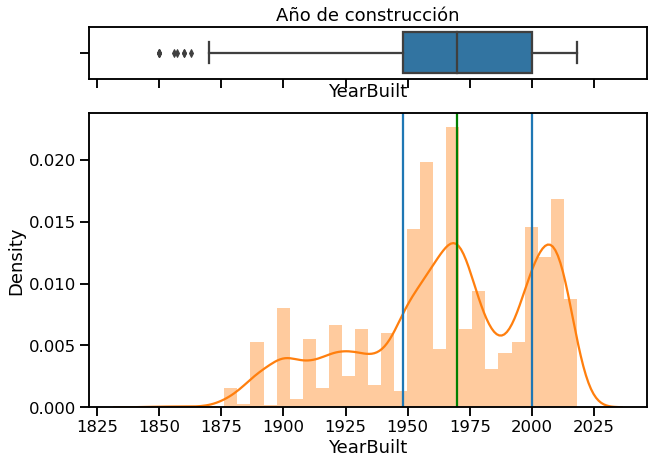

In [110]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,7),gridspec_kw={"height_ratios": (.15, .85)})
 
#Se añade un gráfico a cada parte

sns.boxplot(df_2.YearBuilt, ax=ax_box)
sns.distplot(df_2.YearBuilt, ax=ax_hist, kde=False, hist=False)
sns.distplot(df_2.YearBuilt, ax=ax_hist, kde=True, hist=True,norm_hist=False)

plt.axvline(df_2.YearBuilt.quantile(0.25))
plt.axvline(df_2.YearBuilt.quantile(0.50),color='g')
plt.axvline(df_2.YearBuilt.quantile(0.75))
plt.ticklabel_format(style='plain', axis='x') 
 
ax_box.set_title("Año de construcción")
plt.show()


C:\Users\arrua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\arrua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


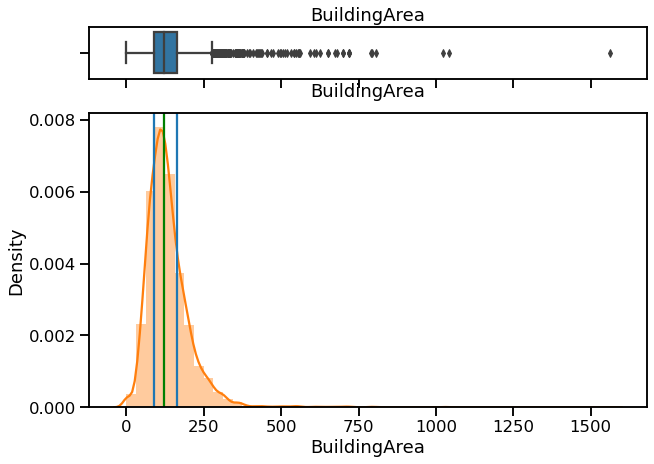

In [111]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,7),gridspec_kw={"height_ratios": (.15, .85)})
 
#Se añade un gráfico a cada parte

sns.boxplot(df_2.BuildingArea, ax=ax_box)
sns.distplot(df_2.BuildingArea, ax=ax_hist, kde=False, hist=False)
sns.distplot(df_2.BuildingArea, ax=ax_hist, kde=True, hist=True,norm_hist=False)

plt.axvline(df_2.BuildingArea.quantile(0.25))
plt.axvline(df_2.BuildingArea.quantile(0.50),color='g')
plt.axvline(df_2.BuildingArea.quantile(0.75))
plt.ticklabel_format(style='plain', axis='x') 
 
ax_box.set_title("BuildingArea")
plt.show()

In [112]:
df_2.isnull().sum()

Price                   0
Distance                0
Landsize                0
Propertycount           0
airbnb_price_mean       0
                     ... 
date_month_7            0
date_month_8            0
date_month_9            0
BuildingArea         1234
YearBuilt               0
Length: 858, dtype: int64

Es necesario escalar si vamos a utilizar un método de imputación basado en distancias para que los valores converjan mas rápido.

In [116]:
from sklearn.preprocessing import RobustScaler

variables_bef=df_2[['YearBuilt','BuildingArea']]

scaler=RobustScaler()

df_2[['YearBuilt','BuildingArea']]=scaler.fit_transform(df_2[['YearBuilt','BuildingArea']])

variables_bef_scaled=df_2[['YearBuilt','BuildingArea']]

C:\Users\arrua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\arrua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


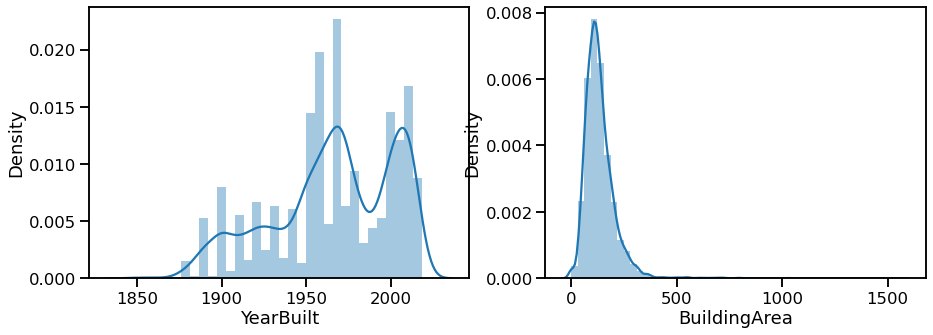

In [117]:
fig,axs=plt.subplots(nrows=1,ncols=2,sharex=False,figsize=(15,5))

sns.distplot(variables_bef.YearBuilt,ax=axs[0])

sns.distplot(variables_bef.BuildingArea,ax=axs[1])

plt.show()


C:\Users\arrua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\arrua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


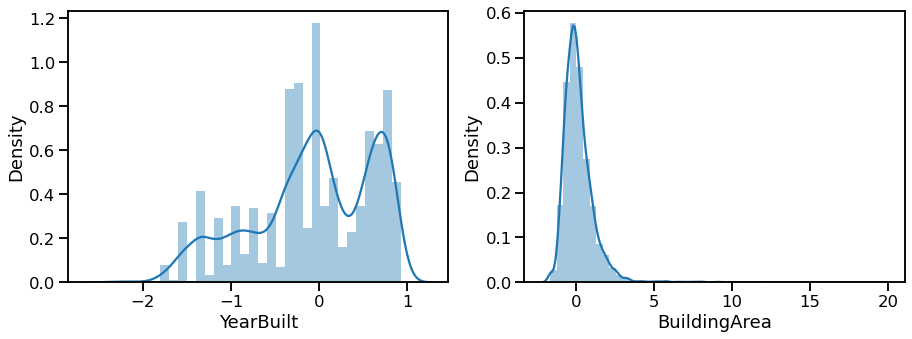

In [118]:
fig,axs=plt.subplots(nrows=1,ncols=2,sharex=False,figsize=(15,5))

sns.distplot(df_2.YearBuilt,ax=axs[0])

sns.distplot(df_2.BuildingArea,ax=axs[1])

plt.show()

In [120]:
df_2[['YearBuilt','BuildingArea']].isnull().sum()

YearBuilt          0
BuildingArea    1234
dtype: int64

In [121]:
mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())

df_2[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(df_2[['YearBuilt', 'BuildingArea']])

In [122]:
df_2[['YearBuilt','BuildingArea']].isnull().sum()

YearBuilt       0
BuildingArea    0
dtype: int64

Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

C:\Users\arrua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\arrua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\arrua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

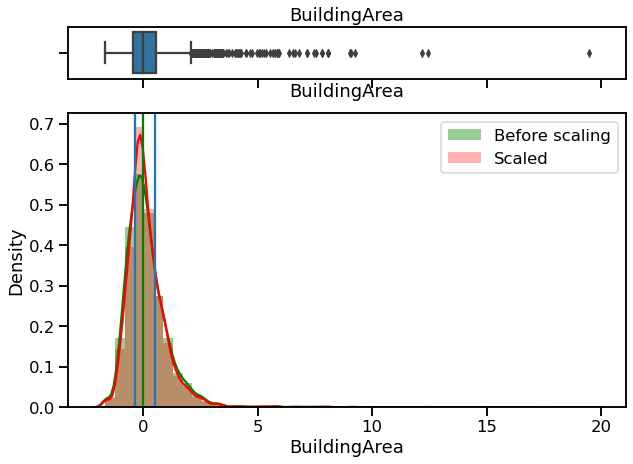

In [124]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,7),gridspec_kw={"height_ratios": (.15, .85)})
 
#Se añade un gráfico a cada parte

sns.boxplot(variables_bef_scaled.BuildingArea, ax=ax_box)

sns.distplot(variables_bef_scaled.BuildingArea,color='g',ax=ax_hist,label='Before scaling')
sns.distplot(df_2.BuildingArea,color='r',hist_kws=dict(alpha=0.3),ax=ax_hist,label='Scaled')

plt.axvline(df_2.BuildingArea.quantile(0.25))
plt.axvline(df_2.BuildingArea.quantile(0.50),color='g')
plt.axvline(df_2.BuildingArea.quantile(0.75))
plt.ticklabel_format(style='plain', axis='x') 
 
ax_box.set_title("BuildingArea")
plt.legend()
plt.show()

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

Primero es necesario escalar los datos. En este caso únicamente se escalarán las variables numéricas, con el mismo método.

In [130]:
cols_vars_to_scale=df_num.columns

In [131]:
scaler=RobustScaler()

df_2[cols_vars_to_scale]=scaler.fit_transform(df_2[cols_vars_to_scale])

In [132]:
df_2

,Price,Distance,Landsize,Propertycount,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_weekly_price_count,airbnb_monthly_price_mean,airbnb_monthly_price_count,Rooms_1,Rooms_10,Rooms_2,Rooms_3,Rooms_4,Rooms_5,Rooms_6,Rooms_7,Rooms_8,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,Postcode_3000.0,Postcode_3002.0,Postcode_3003.0,Postcode_3006.0,Postcode_3011.0,Postcode_3012.0,Postcode_3013.0,Postcode_3015.0,Postcode_3016.0,Postcode_3018.0,Postcode_3019.0,Postcode_3020.0,Postcode_3021.0,Postcode_3023.0,Postcode_3024.0,Postcode_3025.0,Postcode_3027.0,Postcode_3028.0,Postcode_3029.0,Postcode_3030.0,Postcode_3031.0,Postcode_3032.0,Postcode_3033.0,Postcode_3037.0,Postcode_3039.0,Postcode_3040.0,Postcode_3042.0,Postcode_3043.0,Postcode_3044.0,Postcode_3046.0,Postcode_3047.0,Postcode_3049.0,Postcode_3051.0,Postcode_3052.0,Postcode_3053.0,Postcode_3054.0,Postcode_3055.0,Postcode_3056.0,Postcode_3057.0,Postcode_3058.0,Postcode_3059.0,Postcode_3064.0,Postcode_3065.0,Postcode_3066.0,Postcode_3067.0,Postcode_3068.0,Postcode_3070.0,Postcode_3071.0,Postcode_3072.0,Postcode_3073.0,Postcode_3074.0,Postcode_3076.0,Postcode_3078.0,Postcode_3079.0,Postcode_3081.0,Postcode_3082.0,Postcode_3083.0,Postcode_3084.0,Postcode_3088.0,Postcode_3095.0,Postcode_3101.0,Postcode_3102.0,Postcode_3103.0,Postcode_3104.0,Postcode_3105.0,Postcode_3106.0,Postcode_3107.0,Postcode_3108.0,Postcode_3109.0,Postcode_3113.0,Postcode_3116.0,Postcode_3121.0,Postcode_3122.0,Postcode_3123.0,Postcode_3124.0,Postcode_3125.0,Postcode_3126.0,Postcode_3127.0,Postcode_3128.0,Postcode_3130.0,Postcode_3131.0,Postcode_3132.0,Postcode_3133.0,Postcode_3134.0,Postcode_3135.0,Postcode_3136.0,Postcode_3138.0,Postcode_3141.0,Postcode_3142.0,Postcode_3143.0,Postcode_3144.0,Postcode_3145.0,Postcode_3146.0,Postcode_3147.0,Postcode_3148.0,Postcode_3149.0,Postcode_3150.0,Postcode_3151.0,Postcode_3152.0,Postcode_3153.0,Postcode_3155.0,Postcode_3156.0,Postcode_3161.0,Postcode_3162.0,Postcode_3163.0,Postcode_3165.0,Postcode_3166.0,Postcode_3167.0,Postcode_3168.0,Postcode_3169.0,Postcode_3170.0,Postcode_3171.0,Postcode_3172.0,Postcode_3173.0,Postcode_3174.0,Postcode_3175.0,Postcode_3178.0,Postcode_3179.0,Postcode_3181.0,Postcode_3182.0,Postcode_3183.0,Postcode_3184.0,Postcode_3185.0,Postcode_3186.0,Postcode_3187.0,Postcode_3188.0,Postcode_3189.0,Postcode_3190.0,Postcode_3191.0,Postcode_3192.0,Postcode_3193.0,Postcode_3194.0,Postcode_3195.0,Postcode_3196.0,Postcode_3197.0,Postcode_3198.0,Postcode_3199.0,Postcode_3204.0,Postcode_3205.0,Postcode_3206.0,Postcode_3207.0,Postcode_3337.0,Postcode_3338.0,Postcode_3429.0,Postcode_3752.0,Postcode_3754.0,Postcode_3775.0,Postcode_3777.0,Postcode_3782.0,Postcode_3802.0,Postcode_3805.0,Postcode_3806.0,Postcode_3809.0,Postcode_3810.0,Postcode_3977.0,Bathroom_0.0,Bathroom_1.0,Bathroom_2.0,Bathroom_3.0,Bathroom_4.0,Bathroom_5.0,Bathroom_6.0,Bathroom_8.0,Car_0.0,Car_1.0,Car_10.0,Car_2.0,Car_3.0,Car_4.0,Car_5.0,Car_6.0,Car_7.0,Car_8.0,Car_9.0,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,SellerG_@Realty,SellerG_ASL,SellerG_Abercromby's,SellerG_Alexkarbon,SellerG_Allens,SellerG_Anderson,SellerG_Appleby,SellerG_Aquire,SellerG_Ascend,SellerG_Ash,SellerG_Australian,SellerG_Barlow,SellerG_Barry,SellerG_Bayside,SellerG_Bekdon,SellerG_Beller,SellerG_Bells,SellerG_Besser,SellerG_Biggin,SellerG_Bowman,SellerG_Brace,SellerG_Brad,SellerG_Buckingham,SellerG_Bullen,SellerG_Burnham,SellerG_Buxton,SellerG_Buxton/Advantage,SellerG_Buxton/Find,SellerG_C21,SellerG_Caine,SellerG_Carter,SellerG_Castran,SellerG_Cayzer,SellerG_Century,SellerG_Chambers,SellerG_Charlton,SellerG_Chisholm,SellerG_Christopher,SellerG_Clairmont,SellerG_Collins,SellerG_Compton,...,Suburb_Oakleigh South,Suburb_Officer,Suburb_Ormond,Suburb_Pakenham,Suburb_Parkdale,Suburb

C:\Users\arrua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


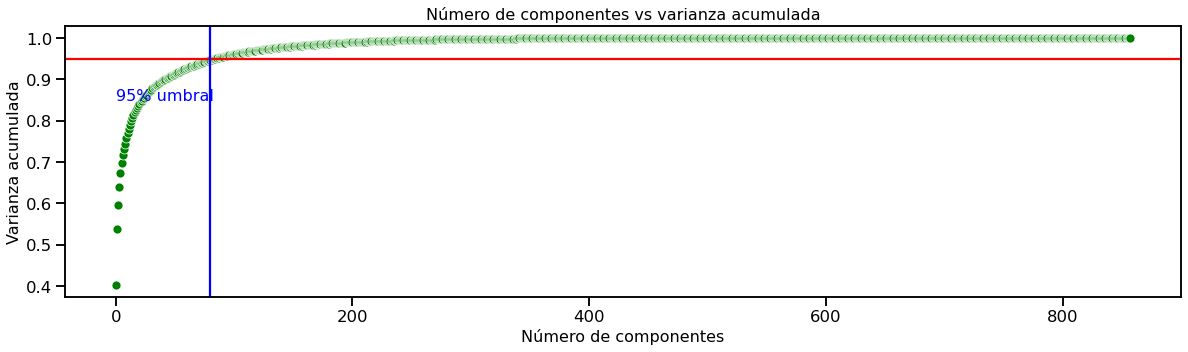

In [141]:
from sklearn.decomposition import PCA

pca = PCA().fit(df_2)

x = np.arange(0, 858, step=1)
y = np.cumsum(pca.explained_variance_ratio_) #acomulado

plt.figure(figsize=(20,5))
sns.scatterplot(x, y, linestyle='-', color='g')

plt.xlabel('Número de componentes',fontsize=16)
plt.ylabel('Varianza acumulada',fontsize=16)
plt.title('Número de componentes vs varianza acumulada',fontsize=16)

plt.axhline(y=0.95, color='r', linestyle='-')
plt.axvline(x=80, color='b', linestyle='-')
plt.text(0.5, 0.85, '95% umbral', color = 'b', fontsize=16)

plt.show()

In [150]:
lista=list(enumerate(pca.explained_variance_ratio_.cumsum(),1))

[(i,j) for (i,j) in lista if (j >= 0.95) & ((j < 0.96))]

[(86, 0.9504114957905132),
 (87, 0.9511611632109331),
 (88, 0.9518956004675471),
 (89, 0.9526229840355193),
 (90, 0.9533450020925824),
 (91, 0.9540486195103293),
 (92, 0.9547472703545189),
 (93, 0.9554285795203299),
 (94, 0.9560918521720618),
 (95, 0.9567286681184378),
 (96, 0.9573590969332688),
 (97, 0.9579700806136259),
 (98, 0.9585778313222542),
 (99, 0.959169125763771),
 (100, 0.9597515169474093)]

Como se puede observar, con n=86 se determina el número de componentes optimos que retiene al menos el 95 % de la varianza.

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
## Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

## If we process our data with the following steps:
categorical_cols = ['Type', 'Regionname']
numerical_cols = ['Rooms', 'Distance']
new_columns = []

# Step 1: encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(melb_df[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 2: Append the numerical columns
X = numpy.hstack([X_cat, melb_df[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 3: Append some new features, like PCA
pca = PCA(n_components=2)
pca_dummy_features = pca.fit_transform(X)
X_pca = numpy.hstack([X, pca_dummy_features])
new_columns.extend(['pca1', 'pca2'])

## Re-build dataframe
processed_melb_df = pandas.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()

Matrix has shape (13580, 11), with columns: ['Type=h', 'Type=t', 'Type=u', 'Regionname=Eastern Metropolitan', 'Regionname=Eastern Victoria', 'Regionname=Northern Metropolitan', 'Regionname=Northern Victoria', 'Regionname=South-Eastern Metropolitan', 'Regionname=Southern Metropolitan', 'Regionname=Western Metropolitan', 'Regionname=Western Victoria']
Matrix has shape (13580, 11), with columns: ['Type=h', 'Type=t', 'Type=u', 'Regionname=Eastern Metropolitan', 'Regionname=Eastern Victoria', 'Regionname=Northern Metropolitan', 'Regionname=Northern Victoria', 'Regionname=South-Eastern Metropolitan', 'Regionname=Southern Metropolitan', 'Regionname=Western Metropolitan', 'Regionname=Western Victoria', 'Rooms', 'Distance']


,Type=h,Type=t,Type=u,Regionname=Eastern Metropolitan,Regionname=Eastern Victoria,Regionname=Northern Metropolitan,Regionname=Northern Victoria,Regionname=South-Eastern Metropolitan,Regionname=Southern Metropolitan,Regionname=Western Metropolitan,Regionname=Western Victoria,Rooms,Distance,pca1,pca2
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.5,-7.669418,-0.292703
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.5,-7.669418,-0.292703
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.5,-7.620201,0.619633
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.5,-7.620201,0.619633
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.5,-7.570984,1.531969


## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
